In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()
print(dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
columns = list(dataset["feature_names"]) + ["MEDV"]

In [4]:
X, y = load_boston(return_X_y=True)
data = np.c_[X, y]

In [5]:
df = pd.DataFrame(data=data, columns=columns)

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**POLYNOMIAL REGRESSION**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
X = df[["LSTAT"]].values
y = df["MEDV"].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LINEAR REGRESSION

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)

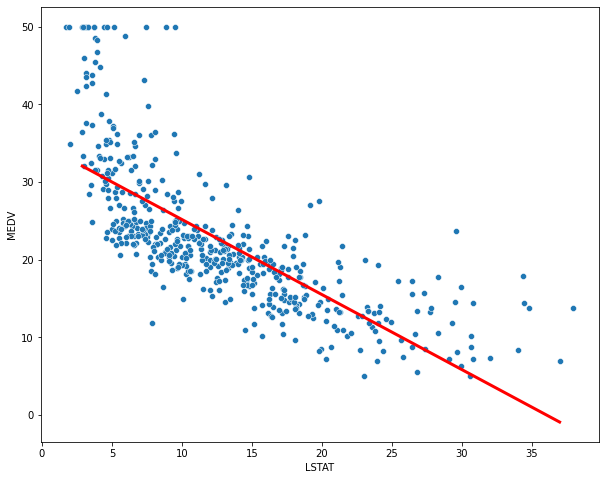

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="LSTAT", y="MEDV", data=df)
sns.lineplot(x=X_test.flatten(), y=y_pred, color="red", linewidth=3)
plt.show()

### POLYNOMIAL REGRESSION

In [13]:
pf = PolynomialFeatures(degree=2)
pf.fit(X_train)

PolynomialFeatures()

In [14]:
X_train_poly = pf.transform(X_train)
X_test_poly = pf.transform(X_test)
X_train_poly

array([[  1.    ,  24.91  , 620.5081],
       [  1.    ,   8.47  ,  71.7409],
       [  1.    ,   7.83  ,  61.3089],
       ...,
       [  1.    ,   5.99  ,  35.8801],
       [  1.    ,  23.27  , 541.4929],
       [  1.    ,  10.63  , 112.9969]])

In [15]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test_poly)

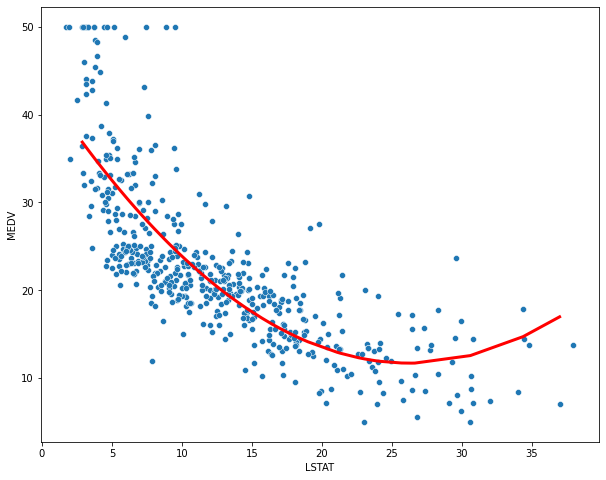

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="LSTAT", y="MEDV", data=df)
sns.lineplot(x=X_test.flatten(), y=y_pred, color="red", linewidth=3)
plt.show()

### CREATE OVERFITTING

In [18]:
X = df.drop(columns=["MEDV"]).values
y = df["MEDV"].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(404, 13)

In [21]:
pf = PolynomialFeatures(degree=3)
pf.fit(X_train, y_train)

PolynomialFeatures(degree=3)

In [22]:
X_train_poly = pf.transform(X_train)
X_test_poly = pf.transform(X_test)

In [23]:
X_train_poly.shape

(404, 560)

In [24]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
y_pred_train = lr.predict(X_train_poly)
y_pred_test = lr.predict(X_test_poly)

In [26]:
from sklearn.metrics import r2_score

In [27]:
train_score = r2_score(y_train, y_pred_train)
train_score

0.9999999999999991

In [28]:
test_score = r2_score(y_test, y_pred_test)
test_score

-1769.6448728483704

**REGULARIZATION**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [30]:
ss = StandardScaler()
ss.fit(X_train_poly)

StandardScaler()

In [31]:
X_train_poly_std = ss.transform(X_train_poly)
X_test_poly_std = ss.transform(X_test_poly)

**Ridge regression**

In [32]:
ridge = Ridge(random_state=42)
ridge.fit(X_train_poly_std, y_train)

Ridge(random_state=42)

In [33]:
ridge.coef_

array([ 0.00000000e+00, -6.66538155e-04, -4.31015701e-01, -1.11674796e+00,
       -1.20714954e-01,  8.83176476e-02,  2.76628390e+00,  1.85747958e+00,
       -1.56237539e+00,  1.57011841e+00, -2.44634909e-01,  8.31651642e-02,
        1.19733826e+00, -6.16272840e-01,  6.59122307e-02, -2.05288071e-01,
        5.75663686e-02,  1.66066563e+00, -5.03335826e-01,  6.71269571e-01,
       -1.40163168e-01, -5.45780277e-01, -9.28996859e-02, -1.60440030e-02,
        2.73800660e-02,  5.05978563e-01,  2.20392407e-03, -2.34396231e-01,
       -7.61917626e-02,  2.76989980e-03, -1.84783916e-01, -6.67334489e-02,
        9.93402303e-02, -3.94257737e-01, -1.87134267e-01, -8.55947875e-02,
        1.47506279e-01, -4.85162609e-01, -1.67543384e-03,  2.61509035e-01,
       -3.36257490e-01, -5.42727441e-01,  3.85004559e-02,  1.93477622e-01,
       -1.96644287e+00,  6.72012793e-01,  7.98045513e-01, -6.29052670e-01,
       -1.85886701e-01, -1.64801324e+00, -1.20714954e-01, -1.02211578e-01,
       -1.74981895e-01, -

In [34]:
ridge.score(X_test_poly_std, y_test)

0.8564279678093182

In [35]:
alphas = np.logspace(-10, -2, 100)

coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_poly_std, y_train)
    coefs.append(ridge.coef_)

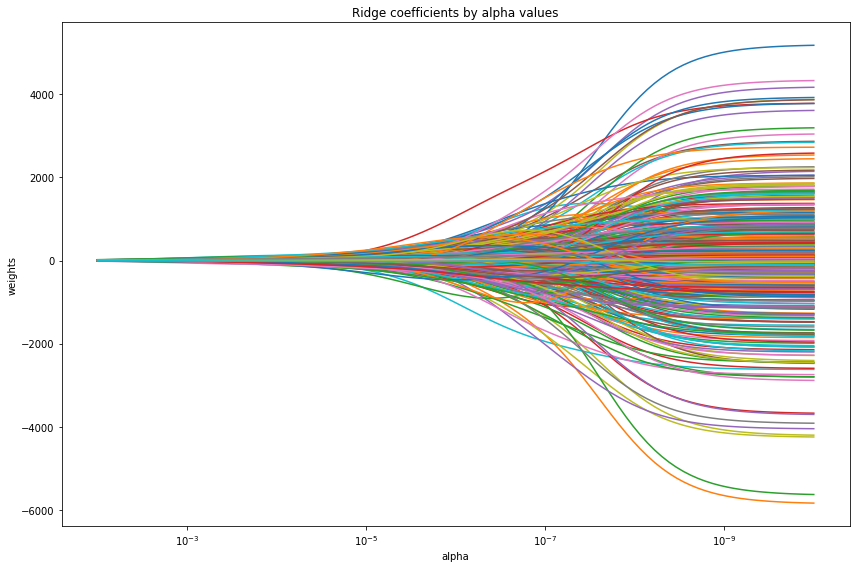

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlim(plt.xlim()[::-1])
plt.title("Ridge coefficients by alpha values")
plt.ylabel("weights")
plt.xlabel("alpha")
plt.tight_layout()
plt.show()

**Lasso regression**

In [37]:
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_poly_std, y_train)

Lasso(alpha=0.1, random_state=42)

In [38]:
lasso.coef_[np.abs(lasso.coef_) > 0]

array([ 7.37338886e-01, -2.71872818e-01,  1.08889053e+00,  1.53234225e+00,
        1.41101275e-01,  6.09464744e-02,  1.27025946e+00, -1.13048669e+00,
       -5.07447894e-01, -5.94309044e-03, -5.96257203e-01,  8.76842347e-02,
       -1.86065769e-01, -3.65729843e-02, -1.60605931e-02,  5.85816152e-01,
        9.43156356e-02, -2.53990582e-01, -1.09840855e+00,  3.80857935e-01,
        6.85464522e-02, -1.03371411e+00, -3.35427827e-01,  5.35942674e+00,
       -5.59032248e-01,  5.37861931e-01, -2.50084699e+00, -2.55576039e+00,
       -1.06562324e+00, -2.55025988e-01, -5.29376465e-01,  6.91898832e-01,
       -1.08455698e-01, -3.25144463e-03,  7.42428595e-01])

In [39]:
lasso.score(X_test_poly_std, y_test)

0.8255558059422986